# Step 1: Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load the Iris dataset using sklearn

In [2]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Step 3: Split the dataset into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Step 4: Feature Scaling

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the KNN model

In [5]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Step 6: Make predictions

In [6]:
y_pred = classifier.predict(X_test)

# Step 7: Evaluate the model

In [7]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred) * 100)

Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Accuracy Score: 96.66666666666667


# Step 8: Error rate analysis for different K values

In [8]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [9]:
# error

# Step 9: Visualize error rate vs K value

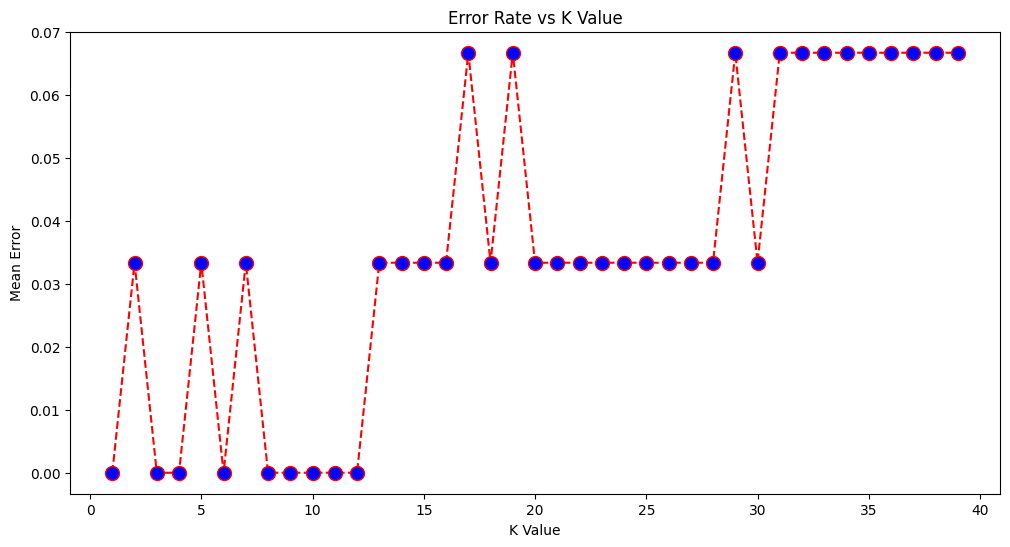

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed',
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [14]:
import joblib
# Save the model to a file
joblib.dump(iris, 'KNN_iris.pkl')

['KNN_iris.pkl']